In [1]:
import qtm.qcompilation
import numpy as np
import types
%load_ext autoreload
%autoreload 2

/home/fptu/miniconda3/envs/thesis/lib/python3.8/site-packages/qiskit/providers/aer/pulse/qutip_extra_lite/fastsparse.py:57: DeprecationWarning: Please use `upcast` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import (upcast, isdense, isscalarlike, get_index_dtype)
/home/fptu/miniconda3/envs/thesis/lib/python3.8/site-packages/qiskit/providers/aer/pulse/qutip_extra_lite/fastsparse.py:57: DeprecationWarning: Please use `isdense` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import (upcast, isdense, isscalarlike, get_index_dtype)
/home/fptu/miniconda3/envs/thesis/lib/python3.8/site-packages/qiskit/providers/aer/pulse/qutip_extra_lite/fastsparse.py:57: DeprecationWarning: Please use `isscalarlike` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import (upcast, isdense, isscalarlike, get_i

In [2]:
isinstance(3, np.ndarray)

False

In [5]:
num_qubits = 3
num_layers = 2
thetas = np.ones(num_qubits*num_layers*5)

compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_linear_ansatz,
    vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
    optimizer = 'qng_fubini_study',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 10, verbose = 1)


Step:   0%|          | 0/10 [00:00<?, ?it/s]

TypeError: create_AME_state() got an unexpected keyword argument 'num_layers'

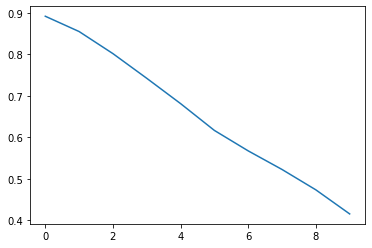

In [7]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

In [12]:
num_qubits = 3
num_layers = 2
n_walltoall = qtm.ansatz.calculate_n_walltoall(num_qubits)
thetas = np.ones(num_layers* 3 * num_qubits + num_layers*n_walltoall)

compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.state.create_haar_state(num_qubits),
    vdagger = qtm.ansatz.create_Walltoall_layerd_ansatz,
    optimizer = 'qng_fubini_study',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 10, verbose = 1)


Step:   0%|          | 0/10 [01:45<?, ?it/s]










Step: 100%|██████████| 10/10 [01:49<00:00, 10.93s/it]


In [15]:
import numpy as np
import qiskit
qc = qiskit.QuantumCircuit(5)
vector = 1/(2*np.sqrt(2))*np.asarray([
    1, 0, 0, 1, 0, 0, 0, 0,
    0, 0, 0, 0, 1, 0, 0, -1,
    0, 0, 0, 0, 0, -1, 1, 0,
    0, 1, 1, 0, 0, 0, 0, 0,    
])
qc.initialize(vector)
transipled_qc = qiskit.compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=3)
transipled_qc.draw(output='mpl')

psi = qiskit.quantum_info.Statevector(qc)
print(np.around(psi, 2))

[ 0.35+0.j -0.  +0.j -0.  +0.j  0.35+0.j -0.  -0.j  0.  +0.j  0.  +0.j
 -0.  +0.j  0.  -0.j  0.  -0.j  0.  -0.j -0.  +0.j  0.35+0.j  0.  -0.j
 -0.  -0.j -0.35+0.j  0.  +0.j -0.  +0.j  0.  -0.j  0.  +0.j -0.  -0.j
 -0.35+0.j  0.35+0.j  0.  +0.j -0.  +0.j  0.35+0.j  0.35+0.j -0.  +0.j
  0.  -0.j -0.  -0.j  0.  +0.j  0.  +0.j]


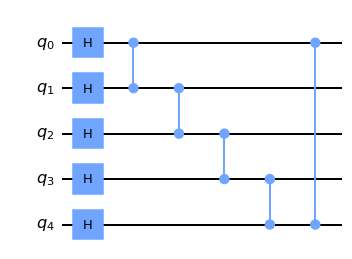

In [12]:
import qtm.ansatz
qc1 = qiskit.QuantumCircuit(5)
for i in range(0, 5):
    qc1.h(i)
for i in range(0, 5):
    if i == 4:
        qc1.cz(i, 0)
    else: 
        qc1.cz(i, i + 1)
qc1.draw('mpl')


In [14]:
print(qiskit.quantum_info.Statevector(qc1))

Statevector([ 0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))
